In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import yfinance as yf
import pygad
import random

from deap import algorithms, base, creator, tools

In [160]:
#stocks = ['ITUB4.SA', 'RENT3.SA', 'PETR4.SA', 'WEGE3.SA', 'RADL3.SA', 'MGLU3.SA', 'ELET6.SA']
stocks = ['WEGE3.SA', 'VIVT3.SA', 'RENT3.SA', 'ABEV3.SA', 'ITUB4.SA', 'VALE3.SA', 'ATOM3.SA', 'PETR4.SA', 'RDOR3.SA', 'TOTS3.SA', 'ELET6.SA']
data = yf.download(stocks, start='2021-01-01', end='2022-12-31')['Adj Close']

data

[*********************100%***********************]  11 of 11 completed


,ABEV3.SA,ATOM3.SA,ELET6.SA,ITUB4.SA,PETR4.SA,RDOR3.SA,RENT3.SA,TOTS3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,
2021-01-04,14.085717,2.405986,30.883389,27.947105,11.470778,63.675331,64.907990,27.178003,69.413048,38.887135,35.927429
2021-01-05,14.385996,2.472819,29.996128,27.766218,11.919136,62.931980,64.524940,27.050726,70.581818,38.556999,38.132572
2021-01-06,14.677172,2.502522,29.825504,28.580206,11.942942,60.321899,60.809353,25.768194,72.896591,38.125290,39.143665
2021-01-07,14.604378,2.443115,29.262436,29.692667,12.300040,58.920189,63.691807,25.699661,77.655182,37.160313,40.761410
2021-01-08,15.041145,2.517374,30.115568,29.683630,12.347653,60.157562,67.991547,27.412971,77.412315,38.133766,43.226540
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,14.620000,2.189443,42.900005,24.558760,20.983213,29.200001,55.279930,28.134451,84.465065,36.565914,38.168091
2022-12-26,14.520000,2.180470,42.582867,24.071287,20.832857,29.840000,53.768250,26.844334,85.238083,35.710243,37.860764
2022-12-27,14.520000,2.126631,41.621845,23.934793,20.974861,30.059999,51.762566,26.556540,87.273392,35.567627,37.682316


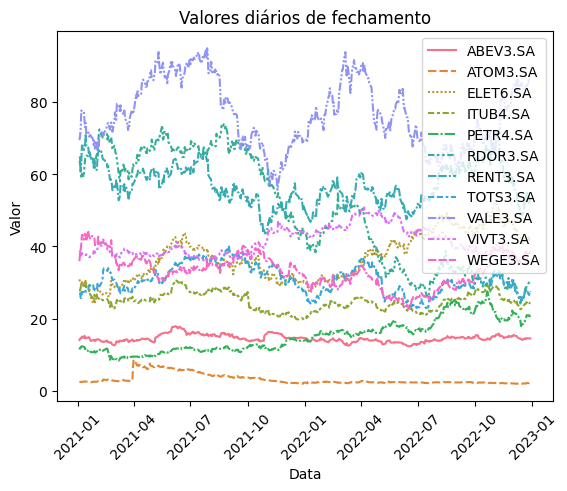

In [161]:
sns.lineplot(data = data)
plt.xticks(rotation = 45)
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Valores diários de fechamento')
plt.show()

In [162]:
returns = data.pct_change().dropna()
returns

,ABEV3.SA,ATOM3.SA,ELET6.SA,ITUB4.SA,PETR4.SA,RDOR3.SA,RENT3.SA,TOTS3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,
2021-01-05,0.021318,0.027778,-0.028729,-0.006472,0.039087,-0.011674,-0.005901,-0.004683,0.016838,-0.008490,0.061378
2021-01-06,0.020240,0.012012,-0.005688,0.029316,0.001997,-0.041475,-0.057584,-0.047412,0.032796,-0.011197,0.026515
2021-01-07,-0.004960,-0.023739,-0.018879,0.038924,0.029900,-0.023237,0.047401,-0.002660,0.065279,-0.025311,0.041328
2021-01-08,0.029907,0.030395,0.029155,-0.000304,0.003871,0.021001,0.067509,0.066667,-0.003127,0.026196,0.060477
2021-01-11,-0.026013,0.026549,-0.021813,-0.022547,-0.008355,-0.015909,-0.019437,-0.001786,-0.000196,-0.011321,-0.030630
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.013870,0.074890,0.015931,0.015726,0.047103,0.035094,0.054665,0.014674,0.006647,0.012105,-0.011299
2022-12-26,-0.006840,-0.004098,-0.007393,-0.019849,-0.007166,0.021918,-0.027346,-0.045855,0.009152,-0.023401,-0.008052
2022-12-27,0.000000,-0.024691,-0.022568,-0.005670,0.006816,0.007373,-0.037302,-0.010721,0.023878,-0.003994,-0.004713


### Teste 1

In [33]:
def portfolio_returns(solution):
    port_returns = 0
    for i in range(len(solution)):
        port_returns += returns.iloc[:, i] * solution[i]
    return port_returns

def cvm(solution):
    """
    Carteira de variância mínima
    """
    port_returns = portfolio_returns(solution)
    return np.std(port_returns)

def constraints(solution):
    bound = (sum(solution) - 1)**2
    return bound

def fitness_function(ga_instance, solution, solution_idx):
    return (cvm(solution) + 100*constraints(solution))


In [31]:
ga = pygad.GA(num_generations=50, num_parents_mating=10,
              fitness_func=fitness_function, sol_per_pop=20,
              gene_type=np.float32, mutation_percent_genes=10,
              gene_space=bounds, num_genes=num_stocks)

ga.run()

c:\Users\Yamac\AppData\Local\Programs\Python\Python310\lib\site-packages\pygad\pygad.py:738: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")


### Teste 2

In [57]:
def portfolio_generate(df):
    portfolio = df.copy()
    portfolio['Total'] = portfolio.sum()
    portfolio['Total'] = portfolio['Total']  / 100
    portfolio['Total'] = portfolio['Total'] + 1
    portfolio = portfolio[['Total']]
    return portfolio

def portfolio_return(portfolio):
    return np.prod(portfolio['Total']) -1

def fitness_function(ga_instance, solution, solution_idx):
    portfolio = portfolio_generate(returns)
    ret = portfolio_return(portfolio)
    return ret

In [65]:
ga_instance = pygad.GA(num_generations=30, num_parents_mating=50,
                       fitness_func=fitness_function, sol_per_pop=90,
                       init_range_low=0, init_range_high=1,
                       parent_selection_type='sss', keep_parents=30,
                       crossover_type='single_point', mutation_percent_genes=10,
                       random_seed=42, num_genes=7)

ga_instance.run() 

c:\Users\Yamac\AppData\Local\Programs\Python\Python310\lib\site-packages\pygad\pygad.py:738: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")


In [66]:
ga_instance.best_solution()

(array([6.31302552, 3.92887282, 5.22131094, 5.60241688, 5.04461411,
        5.74429642, 6.69531025]),
 140999.10240085586,
 0)

### Teste 3

In [88]:
teste = [21,32,43,54,65,76,87]

In [89]:
def constraint(solution):
    bounduary_constraint = (sum(solution) - 1)**2
    return bounduary_constraint

def fitness_function(ga_intance, solution, solution_idx):
    fitness = np.dot(teste, solution)
    return fitness -100*constraint(solution)

In [96]:
ga_instance = pygad.GA(num_generations=30, num_parents_mating=50,
                       fitness_func=fitness_function, sol_per_pop=90,
                       init_range_low=0, init_range_high=1,
                       parent_selection_type='sss', keep_parents=30,
                       crossover_type='single_point', mutation_percent_genes=10,
                       random_seed=42, num_genes=7, gene_space=gene_space)

ga_instance.run() 

c:\Users\Yamac\AppData\Local\Programs\Python\Python310\lib\site-packages\pygad\pygad.py:738: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")


In [99]:
ga_instance.best_solution()

(array([0.03673194, 0.00977085, 0.03142919, 0.01009061, 0.11573761,
        0.14032452, 0.9623102 ]),
 95.50119723987602,
 0)

In [100]:
np.sum([0.03673194, 0.00977085, 0.03142919, 0.01009061, 0.11573761, 0.14032452, 0.9623102])

1.30639492

### Teste 4 - DEAP

In [163]:
n_stocks = len(returns.columns)

In [166]:
#creator.create('FitnessMulti', base.Fitness, weights=(1.0,-1.0))  # O objetivo é maximizar a solução
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))  # O objetivo é minimizar a solução
creator.create("Individual", list, fitness=creator.FitnessMin)  # Lista com os primeiros indivíduos
#creator.create('Individual', list, fitness=creator.FitnessMulti)  

In [167]:
def generateES(icls, size, imin, imax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    return ind

def calculate_returns(individual, dataset=returns):
    x = returns.mul(individual).sum(axis=1)  # Soma dos retornos da carteira dia a dia
    x = x + 1
    x = x.cumprod() - 1
    #########################################
    ret = dataset.copy()
    stock_return_individual = []
    
    for stock in ret.columns:
        ret[stock] = ret[stock] + 1
        stock_return = ret[stock].cumprod() - 1
        stock_return_individual.append(stock_return.tail(1).values)

    stock_return_individual = [arr[0] for arr in stock_return_individual]
    portfolio_return = [x * y for x, y in zip(stock_return_individual, individual)]

    #return np.sum(portfolio_return)
    #return x.tail(1)
    return x

def calculate_risk(individual):
    individual = np.array(individual)
    cov_matrix = returns.cov()
    port_variance = np.dot(individual.T, np.dot(cov_matrix, individual))
    port_risk = np.sqrt(port_variance)
    #####################################
    cvm = np.std(calculate_returns(individual))
    #return port_risk
    return cvm

def evaluate_portfolio(individual):
    # Calculate returns and risk based on individual weights
    returns = calculate_returns(individual)
    risk = calculate_risk(individual)

    penalty = abs((np.sum(individual) - 1)**2)  # Penalidade para a soma dos pesos ser 1
    alocation_penalty = 0
    if max(individual) > 0.33:
        alocation_penalty = 100
    # Return a tuple of the fitness values (returns, -risk as it's a maximization problem)
    #return float(returns - 100*penalty -alocation_penalty), float(risk + 100*penalty + alocation_penalty)
    return (float(risk + 100*penalty + alocation_penalty),)

In [168]:
lower_bound = 0
upper_bound = 1

In [169]:
toolbox = base.Toolbox()
toolbox.register('attr_bool', random.randint, 0, 1)
#toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n_stocks)  # Cria os indivíduos iniciais com n_stocks cromossomos
toolbox.register("individual", generateES, creator.Individual, n_stocks, 0, 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Coleção dos indívduos iniciais - serão armazenados em uma lista
toolbox.register("evaluate", evaluate_portfolio)
toolbox.register("mate", tools.cxTwoPoint)
#toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.1)
toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.5, low=lower_bound, up=upper_bound, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

In [170]:
population_size = 100
num_generations = 50
cx_prob = 0.5
mut_prob = 0.2

In [171]:
population = toolbox.population(n=population_size)
algorithms.eaSimple(population, toolbox, cx_prob, mut_prob, num_generations)

gen	nevals
0  	100   
1  	42    
2  	58    
3  	57    
4  	48    
5  	59    
6  	51    
7  	64    
8  	55    
9  	66    
10 	72    
11 	52    
12 	70    
13 	56    
14 	54    
15 	56    
16 	57    
17 	65    
18 	53    
19 	68    
20 	64    
21 	60    
22 	63    
23 	63    
24 	59    
25 	54    
26 	65    
27 	64    
28 	67    
29 	67    
30 	53    
31 	64    
32 	69    
33 	60    
34 	63    
35 	57    
36 	49    
37 	47    
38 	76    
39 	52    
40 	48    
41 	53    
42 	55    
43 	57    
44 	55    
45 	60    
46 	58    
47 	72    
48 	56    
49 	69    
50 	61    


([[0.038889563769653135,
   0.08416682274876841,
   0.019004700465926283,
   0.016610006866074056,
   0.291561577397101,
   0.06613762933773093,
   0.24112282449875888,
   0.010585239579156247,
   0.06875209064004884,
   0.1275152129263274,
   0.03376950264521961],
  [0.038889563769653135,
   0.08416682274876841,
   0.019004700465926283,
   0.016610006866074056,
   0.291561577397101,
   0.06613762933773093,
   0.24112282449875888,
   0.010585239579156247,
   0.29593987236945485,
   0.1275152129263274,
   0.03376950264521961],
  [0.038889563769653135,
   0.08416682274876841,
   0.019004700465926283,
   0.016610006866074056,
   0.291561577397101,
   0.06613762933773093,
   0.24112282449875888,
   0.010585239579156247,
   0.06875209064004884,
   0.1275152129263274,
   0.03376950264521961],
  [0.038889563769653135,
   0.08416682274876841,
   0.019004700465926283,
   0.016610006866074056,
   0.291561577397101,
   0.06613762933773093,
   0.24112282449875888,
   0.010585239579156247,
   0.068

In [172]:
best_individual = tools.selBest(population, k=1)[0]
best_individual

[0.038889563769653135,
 0.08416682274876841,
 0.019004700465926283,
 0.016610006866074056,
 0.291561577397101,
 0.06613762933773093,
 0.24112282449875888,
 0.010585239579156247,
 0.06875209064004884,
 0.1275152129263274,
 0.03376950264521961]

In [173]:
np.sum(best_individual)

0.9981151708747648

In [174]:
data.head(1)

,ABEV3.SA,ATOM3.SA,ELET6.SA,ITUB4.SA,PETR4.SA,RDOR3.SA,RENT3.SA,TOTS3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,
2021-01-04,14.085717,2.405986,30.883389,27.947105,11.470778,63.675331,64.90799,27.178003,69.413048,38.887135,35.927429


In [175]:
def port_return(weights, dataset=returns):
    x = dataset.mul(weights).sum(axis=1)  # Soma dos retornos da carteira dia a dia
    x = x + 1
    x = x.cumprod() - 1
    return x.tail(1)

In [176]:
port_return(best_individual)

Date
2022-12-29    0.230489
dtype: float64

In [177]:
optimized_portfolio = (returns*best_individual).sum(axis=1)  # Soma dos retornos da carteira dia a dia
optimized_portfolio = optimized_portfolio + 1
optimized_portfolio = optimized_portfolio.cumprod() - 1
px.line(optimized_portfolio, title='Estratégia otimizada', x=optimized_portfolio.index, y=optimized_portfolio.values)

In [178]:
weights_vanilla = np.full(n_stocks, 1/n_stocks)
vanilla_portfolio = (returns*weights_vanilla).sum(axis=1)
vanilla_portfolio = vanilla_portfolio + 1
vanilla_portfolio = vanilla_portfolio.cumprod() - 1
px.line(vanilla_portfolio, title='Estratégia sem otimização', x=vanilla_portfolio.index, y=vanilla_portfolio.values)

In [179]:
port_return(weights_vanilla)

Date
2022-12-29    0.141775
dtype: float64

In [142]:
data_test = yf.download(stocks, start='2023-01-01', end='2023-05-01')['Adj Close']
data_test = data_test.pct_change().dropna()

[*********************100%***********************]  11 of 11 completed


In [180]:
port_return(best_individual, dataset=data_test)

Date
2023-04-28    0.111627
dtype: float64

In [144]:
opt_teste = data_test.mul(best_individual).sum(axis=1)  # Soma dos retornos da carteira dia a dia
opt_teste = opt_teste + 1
opt_teste = opt_teste.cumprod() - 1
px.line(opt_teste, title='Estratégia otimizada', x=opt_teste.index, y=opt_teste.values)

In [145]:
vanilla = data_test.mul(weights_vanilla).sum(axis=1)
vanilla = vanilla + 1
vanilla = vanilla.cumprod() - 1
px.line(vanilla, title='Estratégia sem otimização', x=vanilla.index, y=vanilla.values)

In [181]:
port_return(weights_vanilla, dataset=data_test)

Date
2023-04-28    0.047323
dtype: float64